<a href="https://colab.research.google.com/github/stefanogiagu/corso_AI_2025/blob/main/notebooks/es_27.3/ising_data_sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')
#create ising folder

Mounted at /content/drive


In [ ]:
import os
ising_folder = '/content/drive/MyDrive/ising_data'

In [ ]:
os.chdir(ising_folder)
!pwd

/content/drive/MyDrive/ising_data


In [ ]:
#caricare i file pickle
os.chdir(ising_folder)
with open("ising_results_20x20.pkl", "rb") as f:
    data  = pickle.load(f)
    results = data["results"]

In [ ]:
results[0]

{'initial_state': array([[-1,  1,  1, -1,  1,  1, -1,  1,  1,  1, -1,  1,  1,  1, -1,  1,
          1, -1, -1,  1],
        [-1,  1, -1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1, -1,
         -1, -1, -1,  1],
        [ 1, -1,  1, -1,  1, -1,  1, -1, -1,  1,  1,  1, -1, -1, -1, -1,
          1, -1,  1,  1],
        [-1, -1, -1, -1,  1,  1,  1, -1, -1, -1, -1,  1, -1,  1,  1,  1,
         -1, -1,  1, -1],
        [-1,  1, -1,  1,  1,  1,  1, -1,  1, -1,  1, -1, -1, -1, -1, -1,
         -1,  1,  1,  1],
        [ 1, -1,  1, -1, -1, -1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,
         -1,  1,  1, -1],
        [ 1, -1,  1, -1, -1, -1,  1,  1, -1, -1,  1, -1, -1,  1,  1,  1,
         -1, -1, -1, -1],
        [-1,  1,  1,  1, -1,  1, -1,  1,  1,  1,  1,  1, -1,  1, -1, -1,
         -1,  1, -1, -1],
        [-1,  1,  1, -1, -1, -1, -1,  1,  1, -1, -1,  1, -1, -1,  1,  1,
         -1,  1,  1, -1],
        [-1, -1, -1, -1, -1,  1, -1,  1, -1,  1,  1,  1, -1,  1, -1, -1,
          1, -1, -1

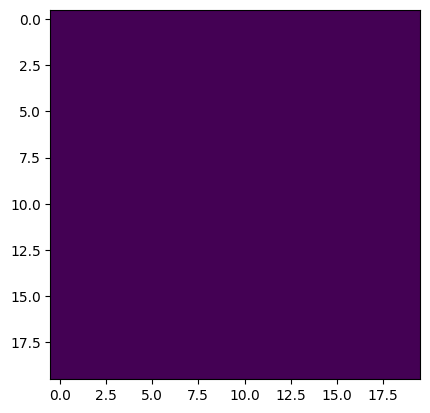

In [ ]:
plt.imshow(results[0]["final_state"])

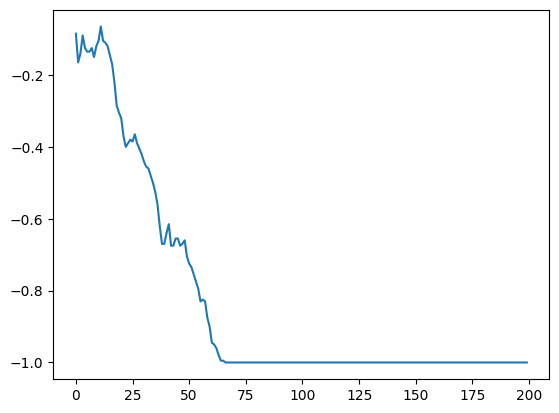

In [ ]:
plt.plot(results[0]["magnetization"])

In [ ]:
temperature_data = {}# fare medie di esempi alla stessa temperatura
time_array=[]#vogliamo fare un istogramma dei tempi di simulazione

for entry in results:
  temp = float(entry["temperature"])
  energy = entry["energy"]
  final_mag = entry["magnetization"][-1] # ultimo valore di array con m(t)
  t = entry["time"]
  time_array.append(t)
  state = entry["final_state"]

  if temp not in temperature_data:
    temperature_data[temp] = {"energy": [], "magnetization": [], "absolute_mag" : [],"state":[]}#se la temperatura è nuova allora creo il dizionario

  temperature_data[temp]["energy"].append(energy)
  temperature_data[temp]["magnetization"].append(final_mag)
  temperature_data[temp]["absolute_mag"].append(abs(final_mag))
  temperature_data[temp]["state"].append(state)



In [ ]:
np.log(10)

np.float64(2.302585092994046)

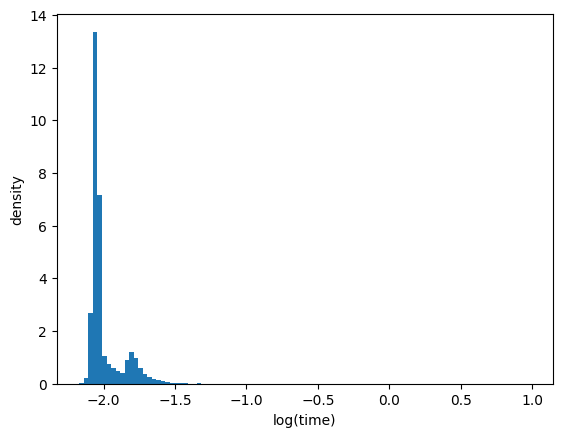

In [ ]:
plt.hist(np.log10(time_array),100,density=True)
plt.xlabel("log(time)")
plt.ylabel("density")
plt.show()

In [ ]:
#calcolo delle medie su insiemi alla stessa temperatura
temps =[]
avg_energies = []
avg_magnetizations=[]
all_energies=[]
all_magnetizations=[]
avg_abs_magnetizations=[]
all_temperature=[]
all_states=[]

for temp, value in sorted(temperature_data.items()):
  temps.append(temp)
  avg_energies.append(np.mean(value["energy"]))
  avg_magnetizations.append(np.mean(value["magnetization"]))
  avg_abs_magnetizations.append(np.mean(value["absolute_mag"]))

  all_energies.extend(value["energy"])# fa listone di tutte le liste a tutte le temperature
  all_magnetizations.extend(value["magnetization"])
  all_temperature.extend([temp]*len(value["energy"]))
  all_states.extend(value["state"])


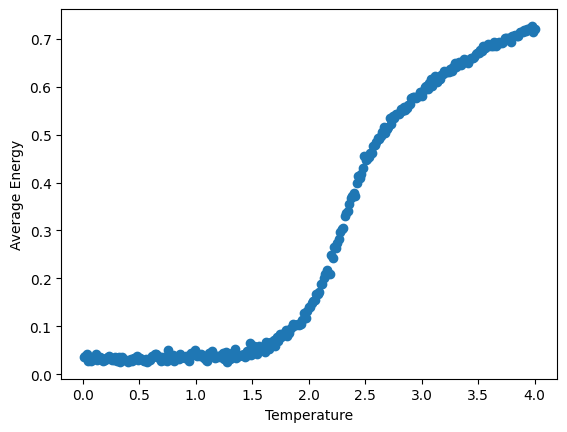

In [ ]:
# scatter plot: average energy vs temperature
plt.scatter(temps, avg_energies)
plt.xlabel("Temperature")
plt.ylabel("Average Energy")
plt.show()

In [ ]:
all_states[0]

array([[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1],
       [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1],
       [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1],
       [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1],
       [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1],
       [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1],
       [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1],
       [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1],
       [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1],
       [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1],
       [-1, -1, -1, -1, -1, -1

In [ ]:
#all_states
#all_temperature# sono le label - le trasformiamo in itervalli [ordinato] T < 2
# 2 <T<2.5 lo chiamiamo critico
# T > 2.5 lo chiamo paramagnetico
all_temp = np.array(all_temperature)
ord_sele = all_temp < 2.0
cri_sele = ((all_temp >= 2.0) & (all_temp < 2.5))
para_sele = all_temp >= 2.5

#abbiamo diviso in classi il nostro dataset, assegnamo una label numerica
labels = np.zeros(shape=all_temp.shape)
labels[ord_sele] = 0
labels[cri_sele] = 1
labels[para_sele] = 2

print("label shape : ",labels.shape)
print("N ordered : ",labels[ord_sele].shape[0])
print("N critical : ",np.sum(cri_sele))
print("N paramagnet : ",np.sum(para_sele))

label shape :  (30000,)
N ordered :  15000
N critical :  3700
N paramagnet :  11300


In [ ]:
type(all_states)
states = np.array(all_states).reshape(-1,20*20)

In [ ]:
states.shape

(30000, 400)

In [ ]:
from sklearn.model_selection import train_test_split
train_to_rest_ratio= 0.6
vali_to_test_ratio = 0.5

X_train, X_rest, y_train, y_rest = train_test_split(states, labels, train_size=train_to_rest_ratio, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_rest, y_rest, train_size=vali_to_test_ratio, random_state=42)

In [ ]:
print("X_train shape : ",X_train.shape)
print("X_val shape : ",X_val.shape)
print("X_test shape : ",X_test.shape)
#

X_train shape :  (18000, 400)
X_val shape :  (6000, 400)
X_test shape :  (6000, 400)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import time
import math

val_accuracy_dic={}
train_accuracy_dic={}
depth_array=[]
for crit in ["gini", "entropy", "log_loss"]:
  val_accuracy_dic[crit]=[]
  train_accuracy_dic[crit]=[]
  for d in range(2,15,1):
    DT_clf = DecisionTreeClassifier(max_depth=d,criterion=crit)
    DT_clf.fit(X_train,y_train)

    val_acc = DT_clf.score(X_val,y_val)
    train_acc = DT_clf.score(X_train,y_train)
    print("Training accuracy : ",train_acc)
    print("Validation accuracy : ",val_acc)
    val_accuracy_dic[crit].append(val_acc)
    train_accuracy_dic[crit].append(train_acc)




Training accuracy :  0.6483333333333333
Validation accuracy :  0.6463333333333333
Training accuracy :  0.7180555555555556
Validation accuracy :  0.7198333333333333
Training accuracy :  0.7529444444444444
Validation accuracy :  0.7521666666666667
Training accuracy :  0.7701666666666667
Validation accuracy :  0.7688333333333334
Training accuracy :  0.7962777777777778
Validation accuracy :  0.7861666666666667
Training accuracy :  0.8178888888888889
Validation accuracy :  0.7988333333333333
Training accuracy :  0.8415
Validation accuracy :  0.8113333333333334
Training accuracy :  0.8652222222222222
Validation accuracy :  0.8055
Training accuracy :  0.8922777777777777
Validation accuracy :  0.8011666666666667
Training accuracy :  0.9115555555555556
Validation accuracy :  0.8013333333333333
Training accuracy :  0.9280555555555555
Validation accuracy :  0.803
Training accuracy :  0.9396111111111111
Validation accuracy :  0.8018333333333333
Training accuracy :  0.9463888888888888
Validation ac

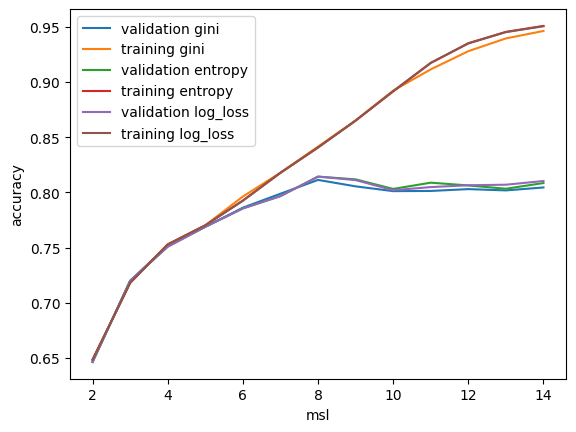

In [ ]:
# plt acc vs depth
for crit in ["gini", "entropy", "log_loss"]:
  plt.plot(np.arange(2,15,1),val_accuracy_dic[crit],label=f"validation {crit}")
  plt.plot(np.arange(2,15,1),train_accuracy_dic[crit],label=f"training {crit}")
plt.xlabel("msl")
plt.ylabel("accuracy")
plt.legend()
plt.show()

In [ ]:
2**20